# CTA Ridership Data

Machine Learning: Concepts and Applications (2020)
The University of Chicago

Lab 1 Exercise

### Data Pre-processing

In [1]:
import pandas as pd

df = pd.read_csv('https://data.cityofchicago.org/api/views/5neh-572f/rows.csv?accessType=DOWNLOAD')


In [2]:
df.head(5)

,station_id,stationname,date,daytype,rides
0,41280,Jefferson Park,12/22/2017,W,6104
1,41000,Cermak-Chinatown,12/18/2017,W,3636
2,40280,Central-Lake,12/02/2017,A,1270
3,40140,Dempster-Skokie,12/19/2017,W,1759
4,40690,Dempster,12/03/2017,U,499


In [4]:
df.shape

(1101828, 5)

In [5]:
df.describe()

,station_id,rides
count,1.101828e+06,1.101828e+06
mean,4.076570e+04,3.108188e+03
std,4.485939e+02,3.151043e+03
min,4.001000e+04,0.000000e+00
25%,4.037000e+04,9.840000e+02
50%,4.076000e+04,2.053000e+03
75%,4.115000e+04,4.096000e+03
max,4.170000e+04,3.632300e+04


In [10]:
df['stationname'].value_counts()

Racine                    7749
Montrose-Brown            7747
Western-Forest Park       7746
Monroe/Dearborn           7746
Montrose-O'Hare           7745
                          ... 
Morgan-Lake               3591
Washington/State          2953
Cermak-McCormick Place    2616
Washington/Wabash         1673
Homan                       31
Name: stationname, Length: 148, dtype: int64

In [11]:
df[df['rides'] == max(df['rides'])].head(1)

,station_id,stationname,date,daytype,rides
825568,41320,Belmont-North Main,06/28/2015,U,36323


In [16]:
df[df['rides']==max(df['rides'])].head()

,station_id,stationname,date,daytype,rides
825568,41320,Belmont-North Main,06/28/2015,U,36323


In [17]:
zero = df[df['rides']==0]
zero.head(5)

,station_id,stationname,date,daytype,rides
23,40200,Randolph/Wabash,12/25/2017,U,0
110,40640,Madison/Wabash,12/05/2017,W,0
333,40640,Madison/Wabash,12/03/2017,U,0
354,40640,Madison/Wabash,12/11/2017,W,0
423,40640,Madison/Wabash,12/30/2017,A,0


In [26]:
zerogroups = zero.groupby(['stationname', 'daytype']).count()
zerogroups.sort_values(by=['date'], ascending = False)

station_id  date  rides
stationname      daytype                         
Madison/Wabash   W               711   711    711
Washington/State W               516   516    516
Skokie           U               390   390    390
                 A               355   355    355
Randolph/Wabash  W               351   351    351
...                              ...   ...    ...
Addison-O'Hare   A                 1     1      1
Ashland-Lake     W                 1     1      1
51st             U                 1     1      1
                 A                 1     1      1
Indiana          U                 1     1      1

[262 rows x 3 columns]

In [24]:
zerogroups.sort_values(by=['date'], ascending = False)

station_id  date  rides
stationname      daytype                         
Madison/Wabash   W               711   711    711
Washington/State W               516   516    516
Skokie           U               390   390    390
                 A               355   355    355
Randolph/Wabash  W               351   351    351
...                              ...   ...    ...
Addison-O'Hare   A                 1     1      1
Ashland-Lake     W                 1     1      1
51st             U                 1     1      1
                 A                 1     1      1
Indiana          U                 1     1      1

[262 rows x 3 columns]

In [30]:
min(df['date'])

'01/01/2001'

In [29]:
max(df['date'])

'12/31/2021'

In [31]:
#create a time index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [32]:
df.head(10)

,station_id,stationname,daytype,rides
date,,,,
2017-12-22,41280,Jefferson Park,W,6104
2017-12-18,41000,Cermak-Chinatown,W,3636
2017-12-02,40280,Central-Lake,A,1270
2017-12-19,40140,Dempster-Skokie,W,1759
2017-12-03,40690,Dempster,U,499
2017-12-30,41660,Lake/State,A,8615
2017-12-17,40180,Oak Park-Forest Park,U,442
2017-12-02,40250,Kedzie-Homan-Forest Park,A,1353
2017-12-07,40120,35th/Archer,W,3353


In [33]:
rides_by_date = df.sort_values(by='date')
rides_by_date.head(10) 

,station_id,stationname,daytype,rides
date,,,,
2001-01-01,41290,Kimball,U,869
2001-01-01,40200,Randolph/Wabash,U,834
2001-01-01,41060,Ashland-Orange,U,242
2001-01-01,40900,Howard,U,2068
2001-01-01,41430,87th,U,1659
2001-01-01,40120,35th/Archer,U,318
2001-01-01,41660,Lake/State,U,2942
2001-01-01,41270,43rd,U,211
2001-01-01,40680,Adams/Wabash,U,700


In [34]:
#sanity check
garfield_red = rides_by_date[rides_by_date['stationname']=='Garfield-Dan Ryan']
garfield_red.head(14)

,station_id,stationname,daytype,rides
date,,,,
2001-01-01,41170,Garfield-Dan Ryan,U,1457
2001-01-02,41170,Garfield-Dan Ryan,W,3748
2001-01-03,41170,Garfield-Dan Ryan,W,3977
2001-01-04,41170,Garfield-Dan Ryan,W,4185
2001-01-05,41170,Garfield-Dan Ryan,W,4533
2001-01-06,41170,Garfield-Dan Ryan,A,3341
2001-01-07,41170,Garfield-Dan Ryan,U,1972
2001-01-08,41170,Garfield-Dan Ryan,W,4590
2001-01-09,41170,Garfield-Dan Ryan,W,4511


In [36]:
garfield_green = rides_by_date[rides_by_date['stationname']=='Garfield-South Elevated']
garfield_green.head(14)

,station_id,stationname,daytype,rides
date,,,,
2001-01-01,40510,Garfield-South Elevated,U,248
2001-01-02,40510,Garfield-South Elevated,W,617
2001-01-03,40510,Garfield-South Elevated,W,657
2001-01-04,40510,Garfield-South Elevated,W,697
2001-01-05,40510,Garfield-South Elevated,W,770
2001-01-06,40510,Garfield-South Elevated,A,443
2001-01-07,40510,Garfield-South Elevated,U,295
2001-01-08,40510,Garfield-South Elevated,W,695
2001-01-09,40510,Garfield-South Elevated,W,696


### Visualizing the Data

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(rc={'figure.figsize':(11, 4)})

<AxesSubplot:xlabel='date'>

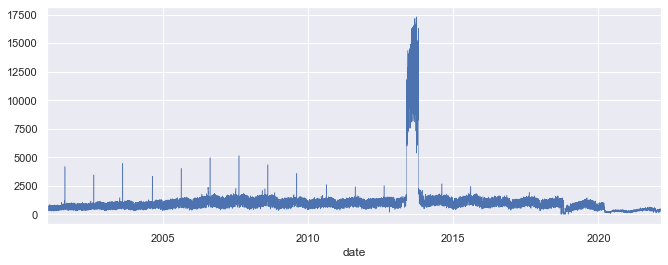

In [41]:
garfield_green['rides'].plot(linewidth=0.5)

<AxesSubplot:xlabel='date'>

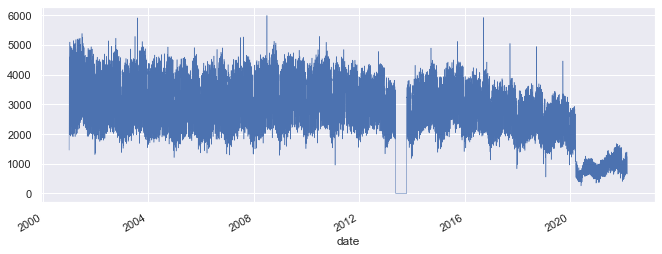

In [43]:
garfield_red['rides'].plot(linewidth=0.5)

<AxesSubplot:xlabel='date'>

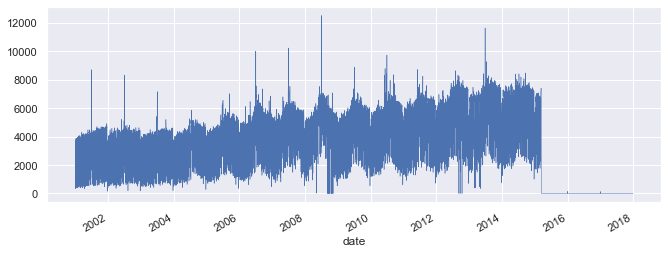

In [48]:
rides_by_date[rides_by_date['stationname']=='Madison/Wabash']['rides'].plot(linewidth=0.5)